# Price-Earnings Ratio Prediction

## 1. Introduction

In this Jupyter notebook, we embark on a project to predict the Price-Earnings Ratio (PE Ratio), a key financial metric, using advanced machine learning techniques. Our aim is to demonstrate the capability of data-driven models in financial analytics. We initiate our project by setting up our computational environment, ensuring all necessary libraries are imported, and loading the dataset we will be analyzing.

## 2. Importing Libraries and Dataset


Libraries: We have chosen a suite of powerful data science libraries to aid our analysis. This includes NumPy for numerical operations, pandas for data manipulation, matplotlib and seaborn for data visualization, and XGBoost for implementing our machine learning model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor

Dataset Loading: The dataset, sourced from publicly available financial data, is loaded from a CSV file. Our initial step is to inspect the first few entries to understand its structure, which includes financial metrics across various companies.

In [ ]:
# Load the dataset from the specified file path
file_path = '/content/drive/Othercomputers/Il_mio_MacBook_Air/Project Christopher Seah/Financial_merged_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to get an initial idea of its structure
df.head()


,PERMNO,date,PRC,VOL,RET,SHROUT,RETX,vwretd,datadate,fyearq,...,previous_quarter_epsf12,EPS_Growth,MARKETCAP,Price_to_sales,EV_to_sales,PE_Ratio,industry,GDP,Inflation_rate,Interest_rate
0,10001,20150227,10.10,5914,0.035897,10488,0.035897,0.055999,20140930,2014,...,0.48,-0.125000,123863.28,7.780301,-337.907632,24.047619,11,98.127236,1.790970,2.496667
1,10001,20150331,9.96,5056,-0.000495,10452,-0.013861,-0.010410,20140930,2014,...,0.48,-0.125000,123863.28,7.672455,-335.034207,23.714286,11,98.127236,1.790970,2.496667
2,10001,20150430,10.07,3059,0.011044,10452,0.011044,0.008776,20141231,2014,...,0.42,-0.380952,115577.76,2.857681,37.804439,38.730769,11,98.567820,1.164006,2.280000
3,10001,20150529,10.00,2494,-0.006951,10488,-0.006951,0.010269,20141231,2014,...,0.42,-0.380952,115577.76,2.837816,37.645941,38.461538,11,98.567820,1.164006,2.280000
4,10001,20150630,10.30,5485,0.030000,10493,0.030000,-0.019272,20141231,2014,...,0.42,-0.380952,115577.76,2.922950,38.325216,39.615385,11,98.567820,1.164006,2.280000


## 3. Data Inspection


Data Conversion: To facilitate numerical computations, we convert all relevant data columns to float type. This ensures uniformity in our calculations.

Data Information: We utilize pandas' capabilities to display detailed information about our dataset, such as data types and the count of non-null values, helping us assess data quality.

In [ ]:
# Convert data types to float for numeric operations
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132205 entries, 0 to 132204
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PERMNO                   132205 non-null  float64
 1   date                     132205 non-null  float64
 2   PRC                      132205 non-null  float64
 3   VOL                      132205 non-null  float64
 4   RET                      132205 non-null  float64
 5   SHROUT                   132205 non-null  float64
 6   RETX                     132205 non-null  float64
 7   vwretd                   132205 non-null  float64
 8   datadate                 132205 non-null  float64
 9   fyearq                   132205 non-null  float64
 10  fqtr                     132205 non-null  float64
 11  fyr                      132205 non-null  float64
 12  dlcq                     132205 non-null  float64
 13  dlttq                    132205 non-null  float64
 14  atq 

Visual Inspection: Through histogram plots for each variable, we gain insights into the distribution of our data. Additionally, we compute and visualize a correlation matrix to identify potential relationships between different financial metrics.

IndexError: index 4 is out of bounds for axis 0 with size 4

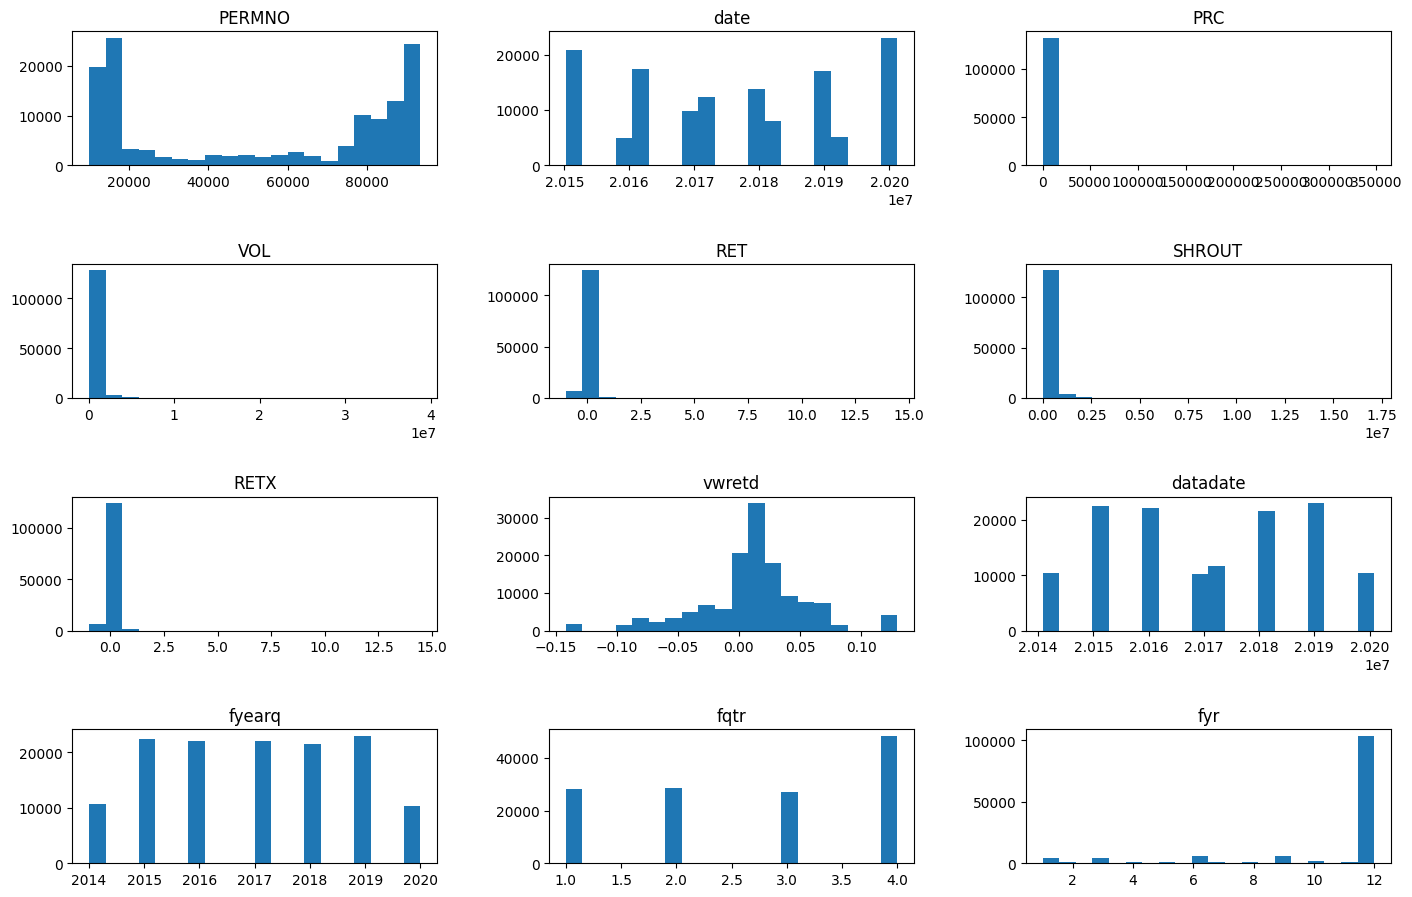

In [ ]:
# Settings for the subplots
n_rows, n_columns = 4, 3
fig, axs = plt.subplots(n_rows, n_columns, figsize=(15, 10))
fig.tight_layout(pad=5.0)

# Loop through all the columns of the dataframe to create the subplots
for i, column in enumerate(df.columns):
    # Calculate the position of the subplot
    row = i // n_columns
    col = i % n_columns

    # Draw the plot in the calculated position
    axs[row, col].hist(df[column], bins=20)
    axs[row, col].set_title(column)

# Show the plot
plt.show()

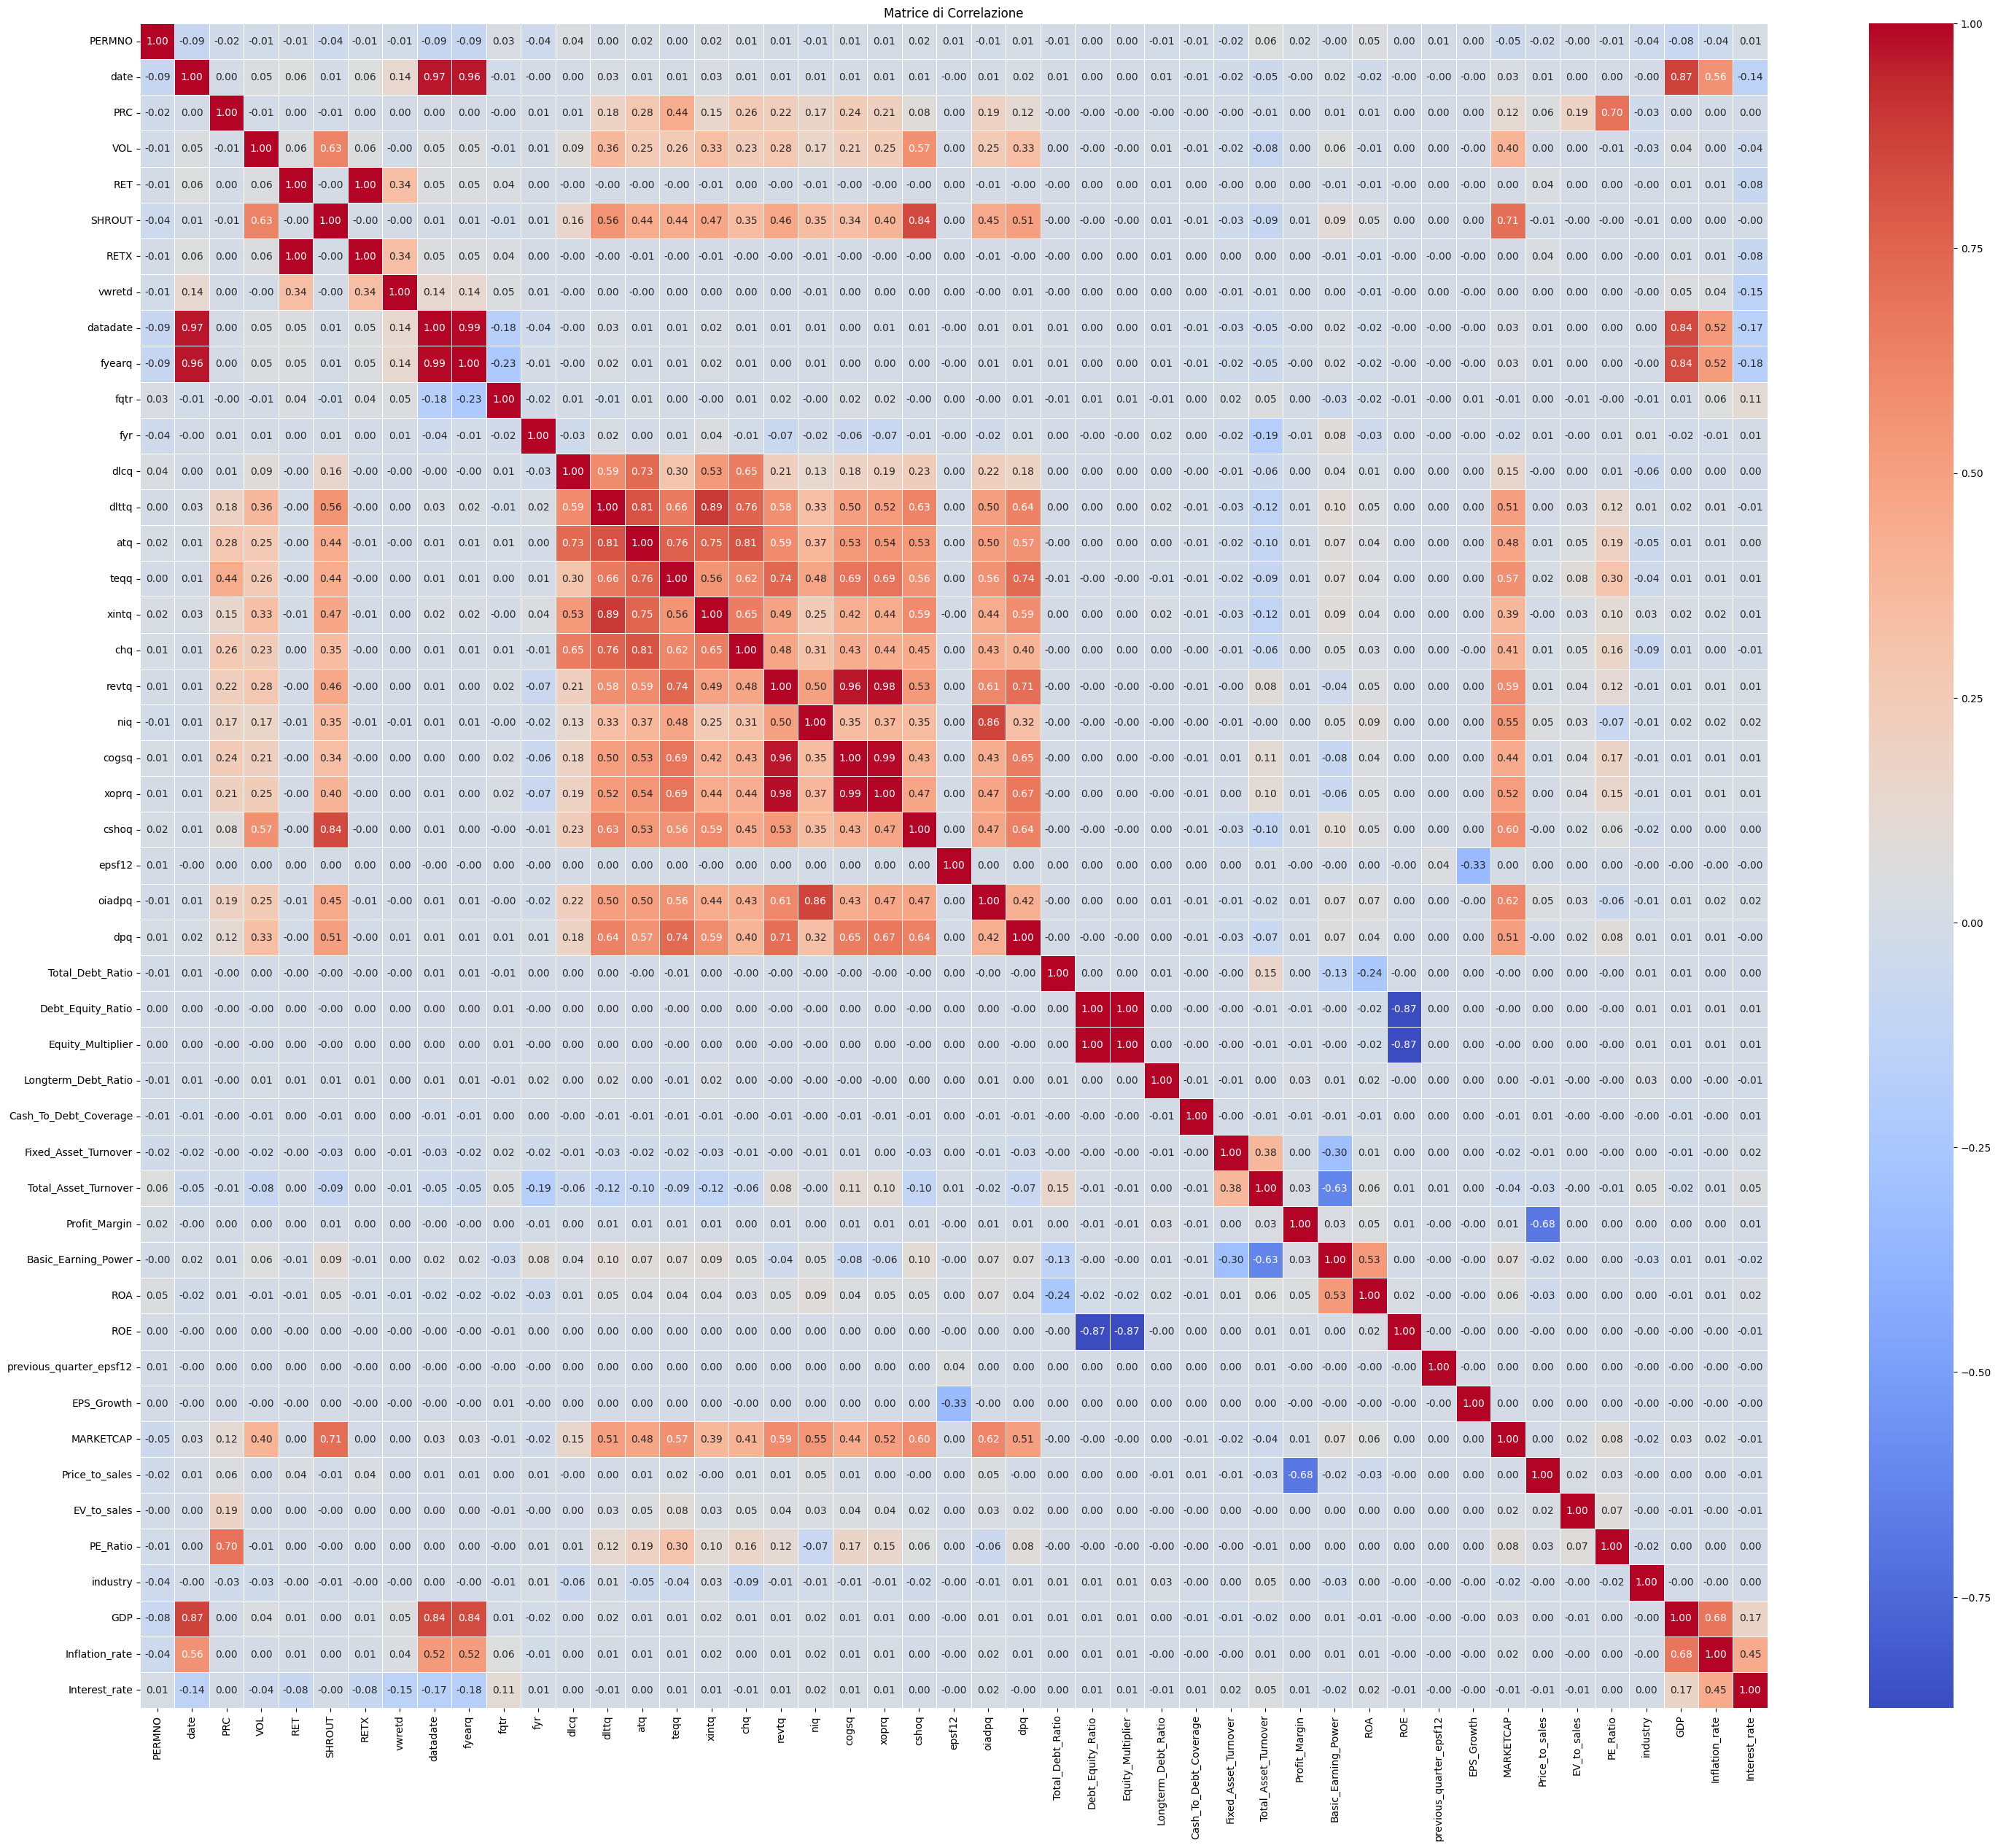

In [ ]:
correlation_matrix = df.corr()
# Creating the correlation matrix plot with Seaborn
plt.figure(figsize=(36, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice di Correlazione')
plt.show()

In [ ]:
data.describe()

,PERMNO,date,PRC,VOL,RET,SHROUT,RETX,vwretd,datadate,fyearq,...,previous_quarter_epsf12,EPS_Growth,MARKETCAP,Price_to_sales,EV_to_sales,PE_Ratio,industry,GDP,Inflation_rate,Interest_rate
count,5000.000000,5000,5000.000000,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,5000,5000.000000,...,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,52313.667400,2018-02-11 18:42:37.440000,42.305000,3.674613e+05,0.009978,1.832040e+05,0.008679,0.012563,2017-09-12 08:40:24.960000,2017.046600,...,-45.635535,-0.002604,9.483639e+06,150.944641,34.581782,8.715710,6.450400,104.179484,1.526858,2.162205
min,10025.000000,2015-02-27 00:00:00,0.033300,1.000000e+00,-0.920559,2.160000e+02,-0.920559,-0.141733,2014-09-30 00:00:00,2014.000000,...,-116425.620000,-614.000000,1.496255e+03,0.040401,-41987.242547,-7239.000000,1.000000,96.997255,-0.112893,0.650000
25%,15472.750000,2016-07-29 00:00:00,7.287500,3.045675e+04,-0.063158,2.702075e+04,-0.064297,0.000432,2016-02-29 00:00:00,2016.000000,...,-0.460000,-0.206875,2.766190e+05,2.530450,18.203806,-3.497554,4.000000,100.415656,1.110033,1.796667
50%,57865.000000,2018-02-28 00:00:00,22.175000,1.016905e+05,0.004750,5.774400e+04,0.003525,0.012063,2017-09-30 00:00:00,2017.000000,...,0.620000,-0.004762,1.252717e+06,5.486511,36.266863,11.916844,5.000000,103.386502,1.806980,2.220000
75%,86593.250000,2019-08-30 00:00:00,52.157500,3.098032e+05,0.074542,1.457748e+05,0.073424,0.032632,2019-03-31 00:00:00,2019.000000,...,2.290000,0.123365,4.955825e+06,11.921595,56.923008,25.576411,9.000000,107.725261,2.107780,2.370000
max,93436.000000,2020-12-31 00:00:00,3600.000000,2.406843e+07,4.863636,8.753289e+06,4.863636,0.129677,2020-08-31 00:00:00,2020.000000,...,274.820000,290.833333,1.061355e+09,132274.470000,31898.700098,10527.000000,12.000000,110.496635,2.686793,3.033333
std,33236.574057,NaN,88.857154,9.890423e+05,0.180054,4.965723e+05,0.180111,0.044431,NaN,1.789712,...,2328.314701,10.907065,4.002104e+07,3130.132305,1182.662574,256.326211,2.720114,3.940234,0.799405,0.525328


# 4. Data Preparation

Sample Creation: Recognizing the importance of representative samples, we discuss and implement strategies for sampling our dataset. This step is crucial for training robust machine learning models in a first step more efficently.

In [ ]:
# Reducing the dataset to a smaller subset for quicker analysis
data = df.sample(n=5000, random_state=42)

# 5. Feature engineering

Feature Selection: Based on the insights gained from our initial data analysis and correlation matrix, we select a subset of features that are most likely to influence the PE Ratio. This includes financial metrics such as earnings per share, revenue growth, and debt ratios.

New Feature Creation: We also explore the creation of new features that could enhance the model’s predictive accuracy. For example, we develop composite indicators that combine multiple financial metrics into a single predictor.

In [ ]:
# Looking for Feature Engineering

# Apply a logarithmic transformation to the PE Ratio and create a new column
data['PE_Ratio'] = np.log(data['PE_Ratio'])

# Select only the numerical variables to calculate correlations
numeric_vars = data.select_dtypes(include=[np.number])

# Initialize a list to save correlations
correlation_list = []

# Calculate the correlations between the product of pairs of variables and PE_Ratio
for col1 in numeric_vars.columns:
    for col2 in numeric_vars.columns:
        if col1 != col2 and col1 != 'PE_Ratio' and col2 != 'PE_Ratio':
            prod = data[col1] * data[col2]  # Edit here to also perform sum and log operations
            correlation = prod.corr(data['PE_Ratio'])
            correlation_list.append((col1, col2, correlation))

# Sort the correlation list in ascending order by correlation value
sorted_correlation_list = sorted(correlation_list, key=lambda x: x[2])

# Print the sorted list of correlations
for pair in sorted_correlation_list:
    print(f"Pair: {pair[0]}, {pair[1]} - Correlation: {pair[2]}")


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Pair: epsf12, Total_Debt_Ratio - Correlation: -0.25027179820262796
Pair: Total_Debt_Ratio, epsf12 - Correlation: -0.25027179820262796
Pair: epsf12, Inflation_rate - Correlation: -0.23005253838075307
Pair: Inflation_rate, epsf12 - Correlation: -0.23005253838075307
Pair: epsf12, industry - Correlation: -0.22083230041297458
Pair: industry, epsf12 - Correlation: -0.22083230041297458
Pair: PERMNO, epsf12 - Correlation: -0.20753457396219463
Pair: epsf12, PERMNO - Correlation: -0.20753457396219463
Pair: epsf12, GDP - Correlation: -0.2061333997590283
Pair: GDP, epsf12 - Correlation: -0.2061333997590283
Pair: Total_Debt_Ratio, previous_quarter_epsf12 - Correlation: -0.20208749795528733
Pair: previous_quarter_epsf12, Total_Debt_Ratio - Correlation: -0.20208749795528733
Pair: epsf12, Interest_rate - Correlation: -0.20187717330598506
Pair: Interest_rate, epsf12 - Correlation: -0.20187717330598506
Pair: fyearq, epsf12 - Correlation: -0.1995274695216861
Pair: epsf12, fyearq - Correlation: -0.1995274

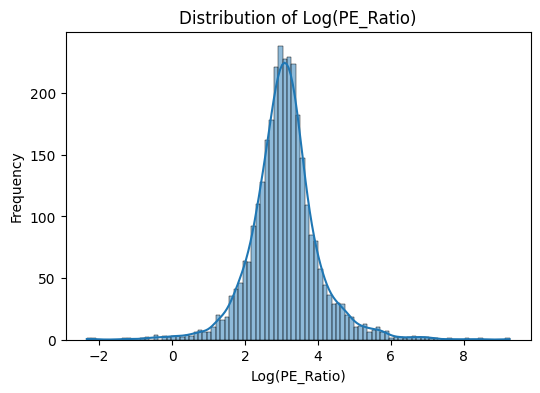

In [ ]:
# Plot the distribution of the transformed PE Ratio variable
plt.figure(figsize=(6, 4))
sns.histplot(data['PE_Ratio'], kde=True)
plt.title('Distribution of Log(PE_Ratio)')
plt.xlabel('Log(PE_Ratio)')
plt.ylabel('Frequency')
plt.show()

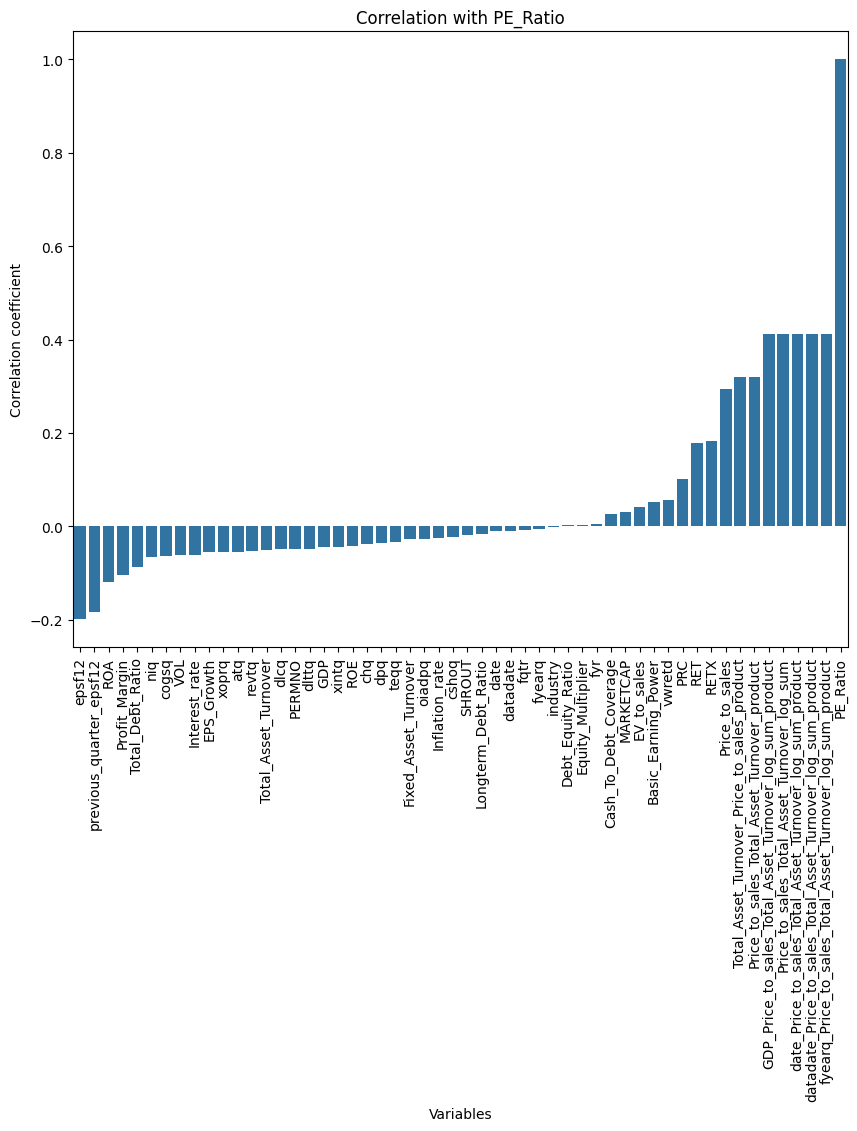

In [ ]:
# Calculate the logarithm of the sum of specified pairs of features and create new columns
data['Price_to_sales_Total_Asset_Turnover_log_sum'] = np.log(data['Price_to_sales'] + data['Total_Asset_Turnover'])

# Calculate the product of specified pairs of features and create new columns
data['Total_Asset_Turnover_Price_to_sales_product'] = data['Total_Asset_Turnover'] * data['Price_to_sales']
data['Price_to_sales_Total_Asset_Turnover_product'] = data['Price_to_sales'] * data['Total_Asset_Turnover']

# Calculate the product of the sum of the log values from above with other variables
data['GDP_Price_to_sales_Total_Asset_Turnover_log_sum_product'] = data['GDP'] * data['Price_to_sales_Total_Asset_Turnover_log_sum']
data['date_Price_to_sales_Total_Asset_Turnover_log_sum_product'] = data['date'] * data['Price_to_sales_Total_Asset_Turnover_log_sum']
data['datadate_Price_to_sales_Total_Asset_Turnover_log_sum_product'] = data['datadate'] * data['Price_to_sales_Total_Asset_Turnover_log_sum']
data['fyearq_Price_to_sales_Total_Asset_Turnover_log_sum_product'] = data['fyearq'] * data['Price_to_sales_Total_Asset_Turnover_log_sum']

# Calculate the correlation matrix for the dataset
correlation_matrix = data.corr()

# Focus on the correlation of variables with PE_Ratio and sort the results
pe_ratio_correlation = correlation_matrix['PE_Ratio'].sort_values()

# Plot the correlation of PE_Ratio with other variables
plt.figure(figsize=(10, 8))
sns.barplot(x=pe_ratio_correlation.index, y=pe_ratio_correlation.values)
plt.xticks(rotation=90)
plt.title('Correlation with PE_Ratio')
plt.xlabel('Variables')
plt.ylabel('Correlation coefficient')
plt.show()

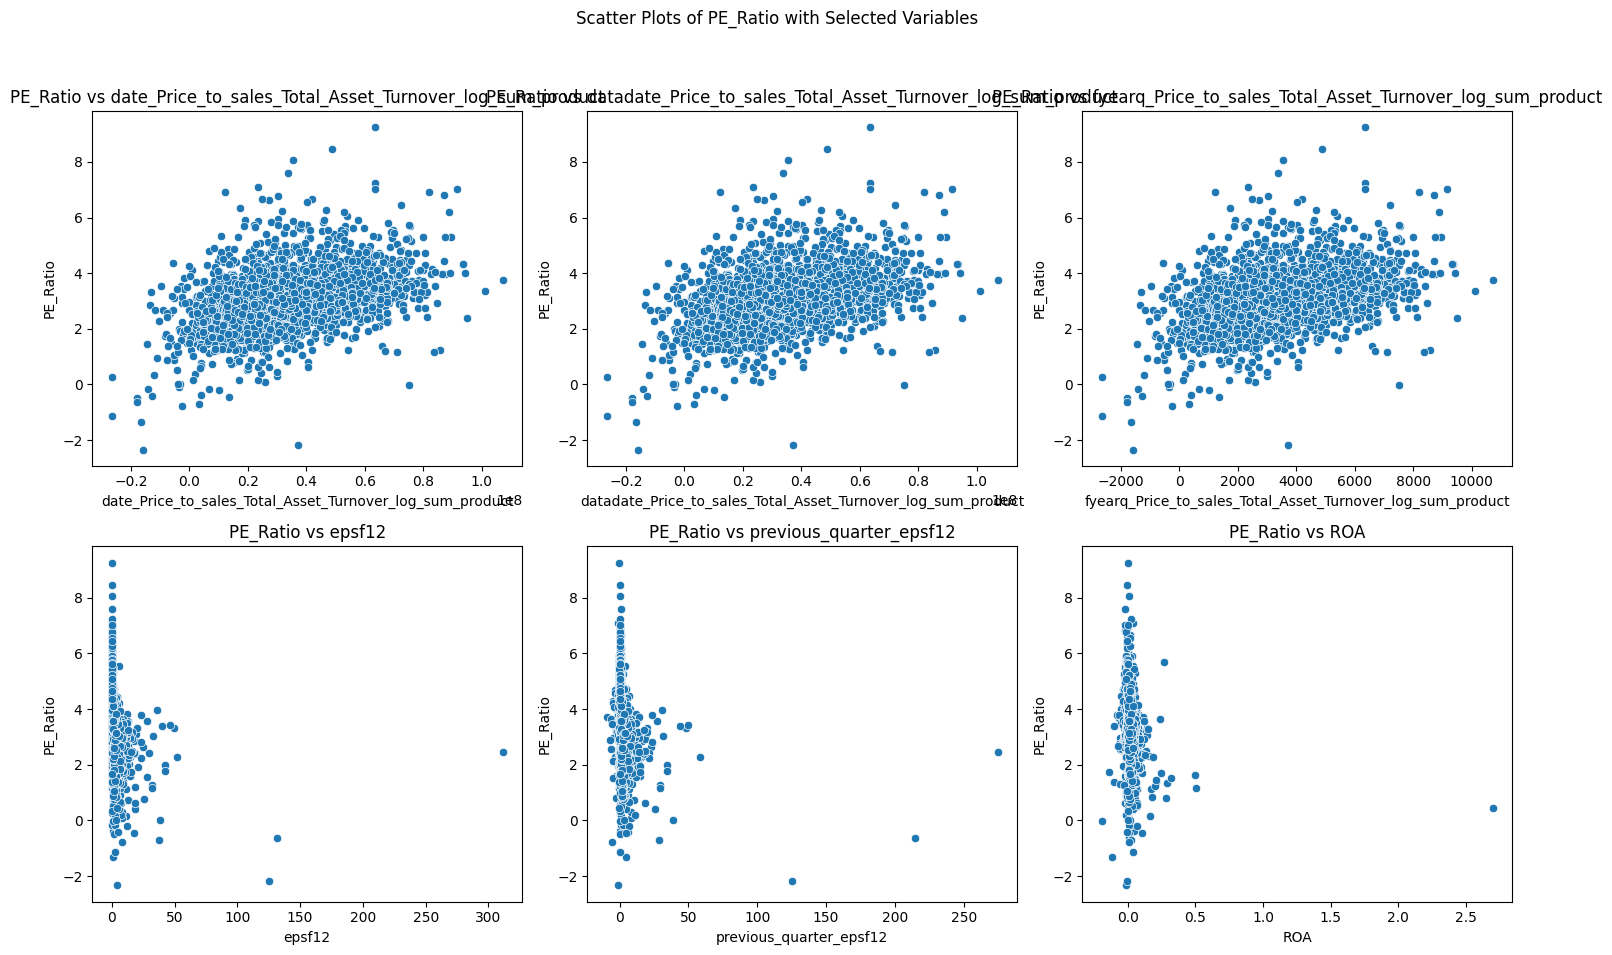

In [ ]:
# Selecting variables with the highest and lowest correlations with PE_Ratio for scatter plots
# Consider the top 3 positively correlated and the top 3 negatively correlated variables
top_correlated_vars = pe_ratio_correlation.index[-4:-1]  # top 3 positive excluding itself (PE_Ratio is excluded to avoid self-correlation)
bottom_correlated_vars = pe_ratio_correlation.index[:3]  # bottom 3 negatively correlated variables

# Combine the selected variables into one list
selected_vars = list(top_correlated_vars) + list(bottom_correlated_vars)

# Create scatter plots to visualize the relationships between PE_Ratio and the selected variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Setup a 2x3 grid of plots
fig.suptitle('Scatter Plots of PE_Ratio with Selected Variables')  # Set the main title for all the plots

# Loop through the list of selected variables and create a scatter plot for each
for i, var in enumerate(selected_vars):
    ax = axes[i//3, i%3]  # Determine the position of the subplot in the grid
    sns.scatterplot(ax=ax, data=data, x=var, y='PE_Ratio')  # Plot scatter plot of the variable against PE_Ratio
    ax.set_title(f'PE_Ratio vs {var}')  # Set the title for each subplot to indicate the variables being plotted
    ax.set_xlabel(var)  # Set the label for the x-axis
    ax.set_ylabel('PE_Ratio')  # Set the label for the y-axis

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make sure everything fits well and the main title is visible
plt.show()  # Display all the plots


# 6. Machine Learning Modeling

Feature Scaling: Given the range of values in our data, we apply standard scaling to normalize the features. This is a critical step in many machine learning algorithms to ensure that no single feature dominates the model due to its scale.

Model Training: We choose the XGBoost algorithm for its effectiveness in regression tasks. The model is fine-tuned through a systematic grid search process to identify the optimal set of parameters for our specific use case.

Model Evaluation: After training, we evaluate our model on a validation dataset using metrics such as Mean Squared Error (MSE) and R-squared. This helps us gauge the accuracy and predictive power of our model.

In [ ]:
# Assuming the 'date' column is already in datetime format
cutoff_date = data['date'].quantile(0.8)  # Find the 80% percentile value of the date column

# Split the dataset into training and validation sets
train_data = data[data['date'] <= cutoff_date].copy()
validation_data = data[data['date'] > cutoff_date].copy()

# Remove the 'date' column
train_data.drop(columns=['date'], inplace=True)
validation_data.drop(columns=['date'], inplace=True)

# Now the data is ready for model training
print("Train data:", train_data.head())
print("Validation data:", validation_data.head())

# Prepare the training and validation data
X_train = train_data.drop(columns=['PE_Ratio'])
y_train = train_data['PE_Ratio']
X_test = validation_data.drop(columns=['PE_Ratio'])
y_test = validation_data['PE_Ratio']

# Set up the pipeline with a scaler and the XGBoost regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
])

param_grid = {
    'xgb__colsample_bytree': [0.7],
    'xgb__n_estimators': [200, 300],
    'xgb__max_depth': [3, 4],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__alpha': [10, 20],
    'xgb__subsample': [0.7, 0.8],
    'xgb__reg_lambda': [10, 50]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)


Train data:      PERMNO    PRC        VOL       RET     SHROUT      RETX    vwretd  \
0   92854.0  62.07    19460.0 -0.013352    16993.0 -0.013352  0.002800   
2   64961.0  18.42    35139.0  0.089618    65433.0  0.089618  0.034997   
4   15398.0  49.07   468103.0  0.031296   184801.0  0.030666  0.001575   
5   26403.0  98.57  1928812.0 -0.025988  1543481.0 -0.025988  0.023777   
10  13738.0  58.66    28646.0 -0.016271   218914.0 -0.022333  0.012063   

      datadate  fyearq  fqtr  ...  \
0   20160331.0  2016.0   1.0  ...   
2   20190630.0  2019.0   1.0  ...   
4   20170331.0  2017.0   1.0  ...   
5   20170331.0  2017.0   2.0  ...   
10  20150331.0  2015.0   1.0  ...   

    Total_Asset_Turnover_Price_to_sales_product  \
0                                      0.708176   
2                                      2.122866   
4                                      1.440371   
5                                      1.717865   
10                                     1.879611   

    Price_to_

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found:  {'xgb__alpha': 10, 'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 300, 'xgb__reg_lambda': 10, 'xgb__subsample': 0.8}


Hyperparameter Tuning: After establishing a baseline model, we proceed to optimize it. Using grid search and cross-validation, we experiment with various hyperparameter settings to find the most effective combination for our model.

Feature Importance Evaluation: Post-optimization, we analyze which features are most influential to our model’s predictions. This helps in further refining our feature selection and understanding the dynamics of our predictive model.

Selected Features:  Index(['PRC', 'epsf12', 'EV_to_sales'], dtype='object')


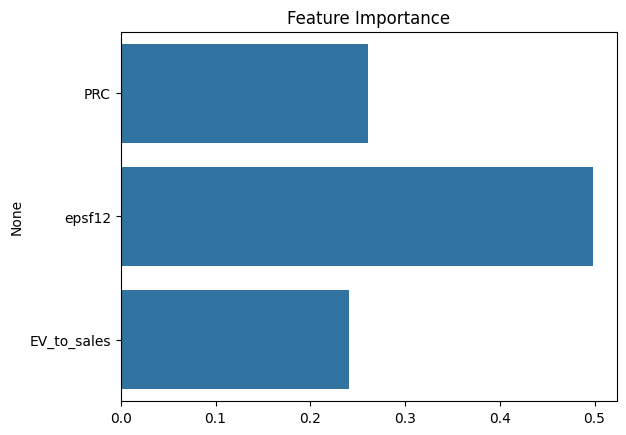

In [ ]:
# Extract the best estimator
best_pipeline = grid_search.best_estimator_

# Initialize RFECV with the best estimator
selector = RFECV(estimator=best_pipeline.named_steps['xgb'], step=1, cv=5, scoring='neg_mean_squared_error')

# Fit RFECV
selector.fit(X_train, y_train)

# Selected features
selected_features = X_train.columns[selector.support_]
print("Selected Features: ", selected_features)

# Feature importances
feature_importances = selector.estimator_.feature_importances_
sns.barplot(x=feature_importances, y=selected_features)
plt.title('Feature Importance')
plt.show()

In [ ]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

# Making predictions on the training and testing set
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

# Calculating metrics for the training set
train_rmse = calculate_rmse(y_train, y_train_pred)
train_mae = calculate_mae(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculating metrics for the testing set
test_rmse = calculate_rmse(y_test, y_test_pred)
test_mae = calculate_mae(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Printing the metrics
print("Training Metrics:")
print(f"RMSE: {train_rmse}, MAE: {train_mae}, R^2: {train_r2}")
print("\nTesting Metrics:")
print(f"RMSE: {test_rmse}, MAE: {test_mae}, R^2: {test_r2}")


Training Metrics:
RMSE: 0.17156518645110383, MAE: 0.09971799032086019, R^2: 0.9629537654398919

Testing Metrics:
RMSE: 0.32329170910375143, MAE: 0.1712008877668233, R^2: 0.9133833296716252


Cross-Validation: To ensure the robustness of our model, we employ k-fold cross-validation. This technique helps in assessing how our model would perform on unseen data.

Validation Metrics: We focus on evaluating the model using the Mean Squared Error (MSE) and R-squared metrics on the validation set. These metrics provide us with a quantitative measure of the model's performance.

In [ ]:
# Performing cross-validation on the entire dataset with the best pipeline
cv_scores = cross_val_score(best_pipeline, data.drop(['PE_Ratio'], axis=1), data['PE_Ratio'], cv=5, scoring='neg_mean_squared_error')

# Converting scores to positive RMSE scores
cv_rmse_scores = np.sqrt(-cv_scores)

print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Mean CV RMSE: {cv_rmse_scores.mean()} ± {cv_rmse_scores.std()}")

Cross-Validation RMSE Scores: [0.22568164 0.24426011 0.23790744 0.23115845 0.24200759]
Mean CV RMSE: 0.23620304646845355 ± 0.006894372209886364


#  Scaling to the Original Dataset

Data Integration: We extend our analysis to the larger and more comprehensive dataset, integrating the additional features and selecting the ones that optimize the model

In [ ]:
df.head()

,PERMNO,date,PRC,VOL,RET,SHROUT,RETX,vwretd,datadate,fyearq,...,previous_quarter_epsf12,EPS_Growth,MARKETCAP,Price_to_sales,EV_to_sales,PE_Ratio,industry,GDP,Inflation_rate,Interest_rate
0,92854,20160831,62.07,19460,-0.013352,16993,-0.013352,0.002800,20160331,2016,...,2.97,0.252525,8.433949e+05,2.428403,27.545554,16.685484,4,101.007284,0.991835,1.920000
1,87344,20200131,1.23,8128,0.000000,25790,0.000000,-0.001728,20190930,2019,...,0.10,-0.100000,3.628635e+04,2.746340,23.716432,13.666667,9,109.038833,1.811480,2.333333
2,64961,20191129,18.42,35139,0.089618,65433,0.089618,0.034997,20190630,2019,...,0.38,-0.078947,1.301122e+06,9.133518,82.627231,52.628571,9,108.309898,1.641387,2.653333
3,89071,20200228,180.59,421690,-0.119975,635044,-0.119975,-0.077918,20190831,2019,...,7.20,0.022222,1.262622e+08,10.385136,62.435612,24.536685,9,110.496635,2.048453,1.793333
4,15398,20170831,49.07,468103,0.031296,184801,0.030666,0.001575,20170331,2017,...,0.04,12.500000,7.080188e+06,6.296736,44.160037,90.870370,4,102.868259,2.587131,2.443333


In [ ]:
# Specify features to retain after all transformations are applied
selected_features = ['PRC', 'epsf12', 'EV_to_sales']

# Calculate the logarithm of the sum of specified pairs of features and create new columns
df['Price_to_sales_Total_Asset_Turnover_log_sum'] = np.log(df['Price_to_sales'] + df['Total_Asset_Turnover'])

# Calculate the product of specified pairs of features and create new columns
df['Total_Asset_Turnover_Price_to_sales_product'] = df['Total_Asset_Turnover'] * df['Price_to_sales']
df['Price_to_sales_Total_Asset_Turnover_product'] = df['Price_to_sales'] * df['Total_Asset_Turnover']

# Calculate the product of the sum of the log values from above with other variables
df['GDP_Price_to_sales_Total_Asset_Turnover_log_sum_product'] = df['GDP'] * df['Price_to_sales_Total_Asset_Turnover_log_sum']
df['date_Price_to_sales_Total_Asset_Turnover_log_sum_product'] = df['date'] * df['Price_to_sales_Total_Asset_Turnover_log_sum']
df['datadate_Price_to_sales_Total_Asset_Turnover_log_sum_product'] = df['datadate'] * df['Price_to_sales_Total_Asset_Turnover_log_sum']
df['fyearq_Price_to_sales_Total_Asset_Turnover_log_sum_product'] = df['fyearq'] * df['Price_to_sales_Total_Asset_Turnover_log_sum']

# Apply a logarithmic transformation to the PE Ratio and create a new column
df['PE_Ratio'] = np.log(df['PE_Ratio'])

# Drop rows with any missing values in the selected features
df = df.dropna()

# Assuming that the 'date' column is already in datetime format
cutoff_date = df['date'].quantile(0.8)  # Find the 80% value of the date column

# Split the dataset into train and validation
train_data = df[df['date'] <= cutoff_date].copy()
test_data = df[df['date'] > cutoff_date].copy()

# Remove the 'date' column
train_data.drop(columns=['date'], inplace=True)
test_data.drop(columns=['date'], inplace=True)

# Select numerical columns to scale
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Train the scaler only on the training data
scaler.fit(train_data[numeric_cols])

# Transform both training and validation data
train_data[numeric_cols] = scaler.transform(train_data[numeric_cols])
test_data[numeric_cols] = scaler.transform(test_data[numeric_cols])

# Now the data is scaled and ready for model training
print("Train data:", train_data.head())
print("Test data:", test_data.head())

# Preparing the train and test data
X_train = train_data.drop(columns=['PE_Ratio'])
y_train = train_data['PE_Ratio']
X_test = test_data.drop(columns=['PE_Ratio'])
y_test = test_data['PE_Ratio']

# Create a new training dataset using only these features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]  # Correction here

# Definition of the parameter grid to be tested
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2]
}

# Creation of the XGBoost model with grid search
grid_search = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1
)

# Training the model with grid search
grid_search.fit(X_train_selected, y_train)

best_model = grid_search.best_estimator_

# Configuring the model with optimized parameters
# Training the optimized model
best_model.fit(X_train_selected, y_train)

# Prediction on the train data
y_train_pred_opt = best_model.predict(X_train_selected)

# Prediction on the test data
y_test_pred_opt = best_model.predict(X_test_selected)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Train data:     PERMNO       PRC       VOL       RET    SHROUT      RETX    vwretd  \
0 -1.41122 -0.034140 -0.396866  0.277549 -0.353061  0.292476  1.404306   
1 -1.41122 -0.034158 -0.397924 -0.062652 -0.353120 -0.172071 -0.549446   
2 -1.41122 -0.034144 -0.400386  0.045217 -0.353120  0.060445  0.015006   
3 -1.41122 -0.034153 -0.401083 -0.123004 -0.353061 -0.107558  0.058930   
4 -1.41122 -0.034113 -0.397395  0.222423 -0.353052  0.237421 -0.810166   

   datadate    fyearq      fqtr  ...       GDP  Inflation_rate  Interest_rate  \
0 -1.659329 -1.649621  0.208287  ... -1.526911        0.352794       0.421442   
1 -1.659329 -1.649621  0.208287  ... -1.526911        0.352794       0.421442   
2 -1.637956 -1.649621  1.056292  ... -1.388404       -0.387785      -0.152217   
3 -1.637956 -1.649621  1.056292  ... -1.388404       -0.387785      -0.152217   
4 -1.637956 -1.649621  1.056292  ... -1.388404       -0.387785      -0.152217   

   Price_to_sales_Total_Asset_Turnover_log_sum  \
0     

In [ ]:
# Calculating metrics for the training set
y_train_exp, y_train_pred_exp = np.exp(y_train), np.exp(y_train_pred_opt)
train_rmse = calculate_rmse(y_train_exp, y_train_pred_exp)
train_mae = calculate_mae(y_train_exp, y_train_pred_exp)
train_r2 = r2_score(y_train_exp, y_train_pred_exp)
# Calculating metrics for the testing set
y_test_exp, y_test_pred_exp = np.exp(y_test), np.exp(y_test_pred_opt)
test_rmse = calculate_rmse(y_test_exp, y_test_pred_exp)
test_mae = calculate_mae(y_test_exp, y_test_pred_exp)
test_r2 = r2_score(y_test_exp, y_test_pred_exp)

# Printing the metrics
print("Training Metrics:")
print(f"RMSE: {train_rmse}, MAE: {train_mae}, R^2: {train_r2}")
print("\nTesting Metrics:")
print(f"RMSE: {test_rmse}, MAE: {test_mae}, R^2: {test_r2}")

Training Metrics:
RMSE: 8.068188701928449, MAE: 0.2410200548987978, R^2: 0.9949326763392827

Testing Metrics:
RMSE: 15.782945048101414, MAE: 0.6104239225766932, R^2: 0.929935965131311


$$
\begin{array}{|l|c|c|}
\hline
\textbf{}& \textbf{RMSE} & \textbf{MAE} & \textbf{R^2 Score} \\
\hline
\textbf{Train} & 8.0682 & 0.2410 & 0.9949 \\
\hline
\textbf{Test} & 15.7829 & 0.6104 & 0.9299 \\
\hline
\end{array}
$$

## 6. Conclusion

We conclude our notebook by presenting the outcomes of our predictive model. The results show promising accuracy, demonstrating the potential of machine learning in financial analysis. We discuss the implications of our findings and propose next steps, which may include experimenting with different models, incorporating more features, or using larger datasets to further enhance model performance.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84842 entries, 0 to 132204
Data columns (total 54 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   PERMNO                                                        84842 non-null  float64
 1   date                                                          84842 non-null  float64
 2   PRC                                                           84842 non-null  float64
 3   VOL                                                           84842 non-null  float64
 4   RET                                                           84842 non-null  float64
 5   SHROUT                                                        84842 non-null  float64
 6   RETX                                                          84842 non-null  float64
 7   vwretd                                                        84842 non